<h2 style="text-align:center;color:#0F4C81;">
Deep Dive into Activation Functions
</h2>

## Introduction
Activation functions play a crucial role in deep learning models by introducing non-linearity, enabling networks to learn complex patterns. In this tutorial, we will explore various activation functions, their properties, and when to use them.

---

## Why Do We Need Activation Functions?
Neural networks consist of multiple layers, where each neuron computes a weighted sum of its inputs and passes it through an activation function. Without activation functions, a neural network would behave like a simple linear model, regardless of the number of layers. Activation functions introduce non-linearity, allowing networks to learn complex features.

---


## 2. Types of Activation Functions

### Step Function (Threshold Function)  

The step function (also called the **threshold function**) is one of the simplest activation functions used in early neural networks. It is a binary function that outputs either 0 or 1 based on a given threshold. The function can be defined as:  

$$
f(x) =
\begin{cases} 
1, & \text{if } x \geq 0 \\
0, & \text{if } x < 0
\end{cases}
$$

Historically, the step function was used in early perceptron models, particularly in **Rosenblatt’s Perceptron (1958)**, which was one of the first artificial neural networks.  

#### **Usage**  
The step function was primarily used in single-layer perceptrons for simple classification tasks, where inputs were classified into two categories (binary classification). However, it has significant limitations:  

1. **Non-differentiability at $ x = 0 $**: This makes gradient-based optimization (such as backpropagation) impossible.  
2. **Zero Gradient**: The function is not useful for learning complex patterns since its gradient is 0 almost everywhere.  
3. **Inability to Handle Non-Linearly Separable Data**: The function cannot model complex relationships, leading to the abandonment of perceptrons in favor of multilayer networks with other activation functions (like sigmoid and ReLU).  

#### **Key Reference**  
- **Rosenblatt, F. (1958)**: *The Perceptron: A Probabilistic Model for Information Storage and Organization in the Brain*. Psychological Review, 65(6), 386–408.  
  - This paper introduced the perceptron, which used the step function as its activation function.

### **Implementation of Rosenblatt’s Perceptron in PyTorch**
- Uses the **Step Function** as an activation function.
- Trains on a simple **binary classification** dataset.
- Updates weights using the **Perceptron Learning Rule**.

#### **Step 1: Import Libraries**

In [48]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

#### **Step 2: Define the Step Function**

In [11]:
class StepFunction(nn.Module):
    def forward(self, x):
        return torch.where(x >= 0, torch.tensor(1.0), torch.tensor(0.0))

#### **Step 3: Create the Perceptron Model**

In [12]:
class Perceptron(nn.Module):
    def __init__(self, input_size):
        super(Perceptron, self).__init__()
        self.linear = nn.Linear(input_size, 1)  # Single-layer perceptron
        self.activation = StepFunction()  # Step function as activation

    def forward(self, x):
        return self.activation(self.linear(x))

#### **Step 4: Generate Linearly Separable Data**

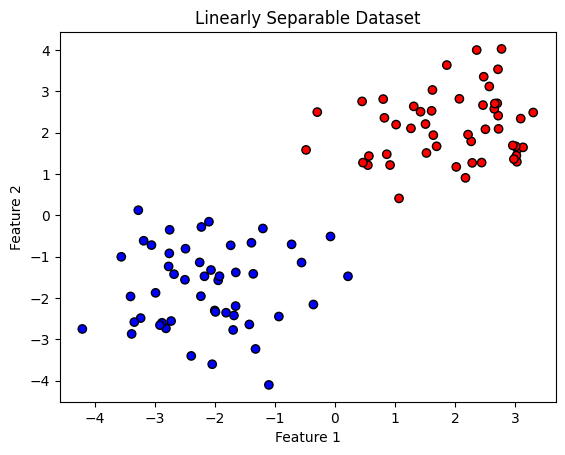

In [13]:
# Generate 2D linearly separable data
torch.manual_seed(42)
num_samples = 100

# Class 0 (negative class)
x0 = torch.randn(num_samples // 2, 2) + torch.tensor([-2.0, -2.0])
y0 = torch.zeros(num_samples // 2, 1)

# Class 1 (positive class)
x1 = torch.randn(num_samples // 2, 2) + torch.tensor([2.0, 2.0])
y1 = torch.ones(num_samples // 2, 1)

# Combine data
X_train = torch.cat([x0, x1], dim=0)
y_train = torch.cat([y0, y1], dim=0)

# Shuffle data
indices = torch.randperm(num_samples)
X_train = X_train[indices]
y_train = y_train[indices]

# Plot dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.view(-1), cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Linearly Separable Dataset")
plt.show()

#### **Step 5: Train the Perceptron Using Rosenblatt’s Algorithm**

In [14]:
# Initialize perceptron model
input_size = 2
model = Perceptron(input_size)

# Learning rate
lr = 0.1
epochs = 10

# Training loop (Perceptron Learning Rule)
for epoch in range(epochs):
    total_loss = 0

    for i in range(len(X_train)):
        x_i = X_train[i]  # Single sample
        y_i = y_train[i]  # Target

        # Forward pass
        y_pred = model(x_i)

        # Compute error (Perceptron Rule: update only on misclassification)
        error = y_i - y_pred
        if error != 0:
            model.linear.weight.data += lr * error * x_i
            model.linear.bias.data += lr * error

    # Evaluate performance
    y_pred = model(X_train)
    accuracy = (y_pred == y_train).float().mean()
    print(f"Epoch {epoch+1}/{epochs}, Accuracy: {accuracy.item()*100:.2f}%")

Epoch 1/10, Accuracy: 100.00%
Epoch 2/10, Accuracy: 100.00%
Epoch 3/10, Accuracy: 100.00%
Epoch 4/10, Accuracy: 100.00%
Epoch 5/10, Accuracy: 100.00%
Epoch 6/10, Accuracy: 100.00%
Epoch 7/10, Accuracy: 100.00%
Epoch 8/10, Accuracy: 100.00%
Epoch 9/10, Accuracy: 100.00%
Epoch 10/10, Accuracy: 100.00%


#### **Step 6: Visualize the Decision Boundary**

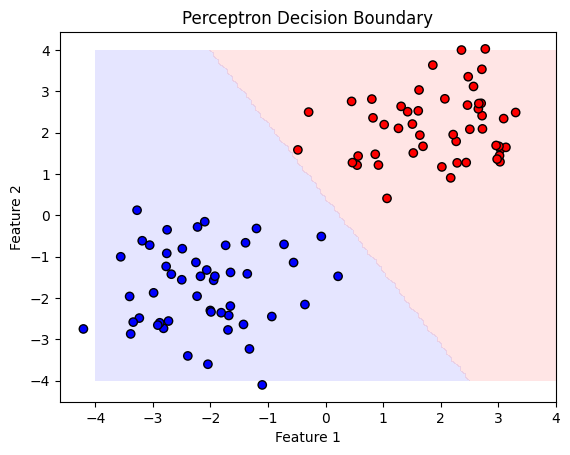

In [15]:
# Generate meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in grid
with torch.no_grad():
    Z = model(grid).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=1, cmap="bwr", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train.view(-1), cmap="bwr", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Perceptron Decision Boundary")
plt.show()

### **Explanation**
1. **Step Function Activation:**  
   - Outputs **1 if input is ≥ 0**, otherwise **0**.
   - Used in the `forward()` method of the perceptron.

2. **Training Algorithm (Rosenblatt’s Perceptron Learning Rule):**  
   - If a point is **misclassified**, update weights using:  

$$
w = w + \eta (y - \hat{y}) x
$$

$$
b = b + \eta (y - \hat{y})
$$

   - This process continues until convergence.

3. **Decision Boundary Visualization:**  
   - The perceptron learns a **linear decision boundary**, splitting the two classes.

---

### **Sigmoid Function**  

#### **Introduction**  
The **sigmoid activation function** is a smooth, S-shaped function that maps any real-valued input to a range between 0 and 1. It is mathematically defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

The sigmoid function was widely used in early neural networks, particularly in **logistic regression** and early **multi-layer perceptrons (MLPs)**. Unlike the **step function**, sigmoid is differentiable, making it suitable for gradient-based learning.


#### **Usage and Properties**  
##### **Advantages:**
- **Smooth and differentiable**, allowing backpropagation.
- **Outputs between 0 and 1**, useful for probability estimation.
- Historically used in **binary classification** (logistic regression, early MLPs).

##### **Disadvantages:**
- **Vanishing Gradient Problem**:  
  - For large values of \( |x| \), the gradient \( \sigma'(x) \) approaches **0**, slowing learning.
  - This makes deep networks hard to train.
- **Not Zero-Centered**:  
  - Outputs are always **positive**, leading to inefficient weight updates.
- **Expensive Computation**:  
  - Requires exponentiation, which is computationally costly compared to ReLU.


#### **Historical Reference**  
The sigmoid function has been used in **logistic regression** since the **19th century** and became popular in neural networks in the **1980s** with the rise of multi-layer perceptrons.

- **Warren McCulloch & Walter Pitts (1943)**: Proposed early neuron models.
- **Rumelhart, Hinton, & Williams (1986)**: Introduced **backpropagation**, making sigmoid practical in neural networks.
  - *Rumelhart, D. E., Hinton, G. E., & Williams, R. J. (1986). "Learning representations by back-propagating errors." Nature, 323(6088), 533-536.*

### **PyTorch Implementation of a Neural Network Using Sigmoid (Multi-class Classification)**

#### **Step 1: Import Libraries**

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

#### **Step 2: Define the Neural Network**

In [17]:
class MultiClassNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MultiClassNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.sigmoid(self.hidden1(x))  # First hidden layer with sigmoid
        x = self.sigmoid(self.hidden2(x))  # Second hidden layer with sigmoid
        x = self.softmax(self.output(x))   # Output layer with softmax
        return x

#### **Step 3: Generate a Synthetic Dataset (3 Classes)**

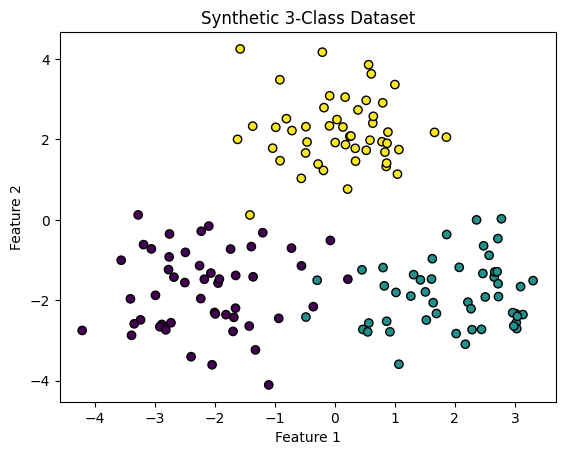

In [18]:
# Set random seed for reproducibility
torch.manual_seed(42)

num_samples = 150

# Generate 3-class dataset (Gaussian blobs)
x0 = torch.randn(num_samples // 3, 2) + torch.tensor([-2.0, -2.0])  # Class 0
y0 = torch.zeros(num_samples // 3, dtype=torch.long)

x1 = torch.randn(num_samples // 3, 2) + torch.tensor([2.0, -2.0])   # Class 1
y1 = torch.ones(num_samples // 3, dtype=torch.long)

x2 = torch.randn(num_samples // 3, 2) + torch.tensor([0.0, 2.0])    # Class 2
y2 = torch.full((num_samples // 3,), 2, dtype=torch.long)

# Combine data
X_train = torch.cat([x0, x1, x2], dim=0)
y_train = torch.cat([y0, y1, y2], dim=0)

# Shuffle dataset
indices = torch.randperm(num_samples)
X_train = X_train[indices]
y_train = y_train[indices]

# Plot dataset
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Synthetic 3-Class Dataset")
plt.show()

#### **Step 4: Train the Neural Network**

In [19]:
# Define model
input_size = 2
hidden_size1 = 8  # First hidden layer
hidden_size2 = 6  # Second hidden layer
output_size = 3   # Three classes

model = MultiClassNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()  # For multi-class classification
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 1.0947
Epoch 200/1000, Loss: 1.0901
Epoch 300/1000, Loss: 1.0839
Epoch 400/1000, Loss: 1.0744
Epoch 500/1000, Loss: 1.0586
Epoch 600/1000, Loss: 1.0311
Epoch 700/1000, Loss: 0.9859
Epoch 800/1000, Loss: 0.9280
Epoch 900/1000, Loss: 0.8734
Epoch 1000/1000, Loss: 0.8220


#### **Step 5: Visualize Decision Boundaries**

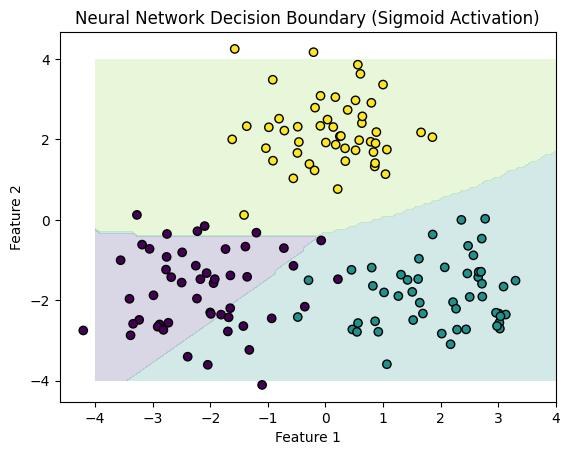

In [20]:
# Generate meshgrid for decision boundary
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)  # Get class with max probability

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Sigmoid Activation)")
plt.show()

---

### **Tanh Activation Function**  

#### **Introduction**  
The **hyperbolic tangent (tanh) activation function** is similar to the **sigmoid function**, but it maps inputs to a range between **-1 and 1** instead of **0 and 1**. This makes it **zero-centered**, which improves training compared to sigmoid.

The function is defined as:

$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$

It can also be rewritten in terms of the **sigmoid function**:

$$
\tanh(x) = 2\sigma(2x) - 1
$$


### **Usage and Properties**  
**Advantages**:  
- **Zero-centered output**: Helps with weight updates in gradient descent.  
- **Smoother than ReLU**: Avoids dead neurons (unlike ReLU).  
- **Better gradient flow than sigmoid**: Reduces vanishing gradient issues.

**Disadvantages**:  
- **Vanishing gradient problem**: For large \( |x| \), the gradient approaches **0**, making training slow.  
- **More expensive than ReLU**: Requires exponentiation.

### **Historical Reference**  
Tanh was introduced in neural networks as an alternative to sigmoid in the **1980s and 1990s**. It was widely used before **ReLU** became dominant.

- **LeCun et al. (1998)**: Suggested **tanh** as a better alternative to **sigmoid** in MLPs.  
  - *LeCun, Y., Bottou, L., Orr, G. B., & Müller, K. R. (1998). "Efficient Backprop." Neural Networks: Tricks of the Trade.*


### **PyTorch Implementation of a Neural Network Using Tanh**
We'll modify the **previous multi-class classification example** by replacing **sigmoid with tanh**.

In [21]:
class TanhNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(TanhNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.tanh = nn.Tanh()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.tanh(self.hidden1(x))  # First hidden layer with tanh
        x = self.tanh(self.hidden2(x))  # Second hidden layer with tanh
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [22]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = TanhNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.6781
Epoch 200/1000, Loss: 0.6098
Epoch 300/1000, Loss: 0.5950
Epoch 400/1000, Loss: 0.5890
Epoch 500/1000, Loss: 0.5858
Epoch 600/1000, Loss: 0.5837
Epoch 700/1000, Loss: 0.5822
Epoch 800/1000, Loss: 0.5809
Epoch 900/1000, Loss: 0.5797
Epoch 1000/1000, Loss: 0.5786


#### **Step 3: Visualize Decision Boundaries**

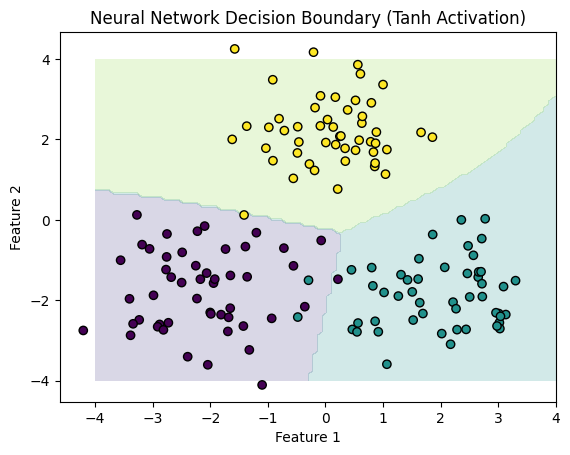

In [23]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Tanh Activation)")
plt.show()

### **ReLU (Rectified Linear Unit) Activation Function**  

#### **Introduction**  
The **Rectified Linear Unit (ReLU)** is one of the most widely used activation functions in modern deep learning. It is defined as:

$$
\text{ReLU}(x) = \max(0, x)
$$

In words, **ReLU returns $x$ if $x$ is positive, otherwise it returns 0**.

### **Why is ReLU Popular?**  
**Advantages**:
- **No vanishing gradient problem** (like sigmoid/tanh).  
- **Computationally efficient** (simple max operation).  
- **Sparse activation** (many neurons output 0, reducing computation).  
- **Helps deep networks learn faster**.

**Disadvantages**:
- **Dying ReLU problem**: Neurons with **negative weighted inputs** always output **0**, leading to dead neurons.
- **Unbounded output**: May cause instability in some models.

### **Historical Reference**  
ReLU was popularized by **Nair & Hinton (2010)** in their paper:  
- *Nair, V., & Hinton, G. E. (2010). "Rectified linear units improve restricted Boltzmann machines." Proceedings of ICML.*  

It gained massive adoption after **Krizhevsky et al. (2012)** used it in **AlexNet**, making deep learning practical.  
- *Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). "ImageNet classification with deep convolutional neural networks." NeurIPS.*

### **PyTorch Implementation of a Neural Network Using ReLU**
We'll modify our previous **multi-class classification example** by replacing **tanh with ReLU**.

#### **Step 1: Define the Neural Network with ReLU**

In [24]:
class ReLUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(ReLUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.relu(self.hidden1(x))  # First hidden layer with ReLU
        x = self.relu(self.hidden2(x))  # Second hidden layer with ReLU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [25]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = ReLUNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.6433
Epoch 200/1000, Loss: 0.5862
Epoch 300/1000, Loss: 0.5805
Epoch 400/1000, Loss: 0.5786
Epoch 500/1000, Loss: 0.5776
Epoch 600/1000, Loss: 0.5770
Epoch 700/1000, Loss: 0.5764
Epoch 800/1000, Loss: 0.5758
Epoch 900/1000, Loss: 0.5752
Epoch 1000/1000, Loss: 0.5747


#### **Step 3: Visualize Decision Boundaries**

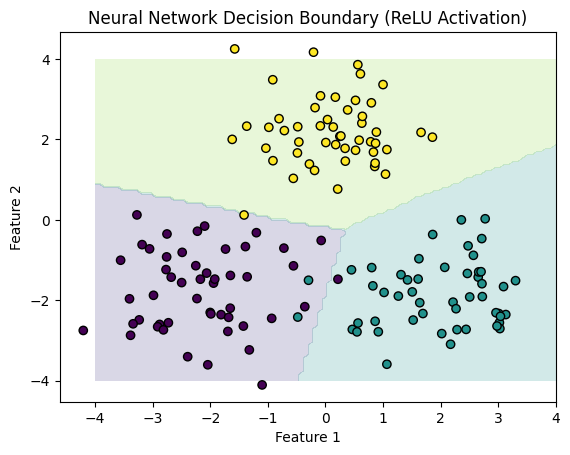

In [26]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (ReLU Activation)")
plt.show()

---

### **Leaky ReLU Activation Function**  

#### **Introduction**  
The **Leaky Rectified Linear Unit (Leaky ReLU)** is a variation of **ReLU** that fixes the **dying ReLU problem**. Instead of setting negative inputs to **zero**, Leaky ReLU allows small negative values:

$$
\text{LeakyReLU}(x) =
\begin{cases} 
    x, & x > 0 \\
    \alpha x, & x \leq 0
\end{cases}
$$

where $\alpha$ is a small positive value (typically **0.01**).

### **Why Use Leaky ReLU?**  
**Advantages**:  
- **Solves dying ReLU issue** by allowing small gradients for negative values.  
- **Retains efficiency** of ReLU while improving performance.  
- **Works well in deep networks** without needing batch normalization.  

**Disadvantages**:  
- **Hyperparameter $\alpha$ needs tuning** (a wrong value may hurt performance).  
- **Still unbounded for positive values**, leading to potential instability.  

### **Historical Reference**  
Leaky ReLU was introduced by **Maas et al. (2013)** in their paper:  
- *Maas, A. L., Hannun, A. Y., & Ng, A. Y. (2013). "Rectifier nonlinearities improve neural network acoustic models." ICML Workshop on Deep Learning for Audio Processing.*  

It became popular in **computer vision** and **deep learning architectures** as an improved version of ReLU.

### **PyTorch Implementation of a Neural Network Using Leaky ReLU**
We'll modify our **multi-class classification** network by replacing **ReLU with Leaky ReLU**.

#### **Step 1: Define the Neural Network with Leaky ReLU**

In [27]:
class LeakyReLUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, alpha=0.01):
        super(LeakyReLUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.leaky_relu = nn.LeakyReLU(negative_slope=alpha)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.leaky_relu(self.hidden1(x))  # First hidden layer with LeakyReLU
        x = self.leaky_relu(self.hidden2(x))  # Second hidden layer with LeakyReLU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [28]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes
alpha = 0.01  # Leaky ReLU slope

model = LeakyReLUNN(input_size, hidden_size1, hidden_size2, output_size, alpha)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.7036
Epoch 200/1000, Loss: 0.5881
Epoch 300/1000, Loss: 0.5802
Epoch 400/1000, Loss: 0.5778
Epoch 500/1000, Loss: 0.5765
Epoch 600/1000, Loss: 0.5756
Epoch 700/1000, Loss: 0.5750
Epoch 800/1000, Loss: 0.5744
Epoch 900/1000, Loss: 0.5740
Epoch 1000/1000, Loss: 0.5736


#### **Step 3: Visualize Decision Boundaries**

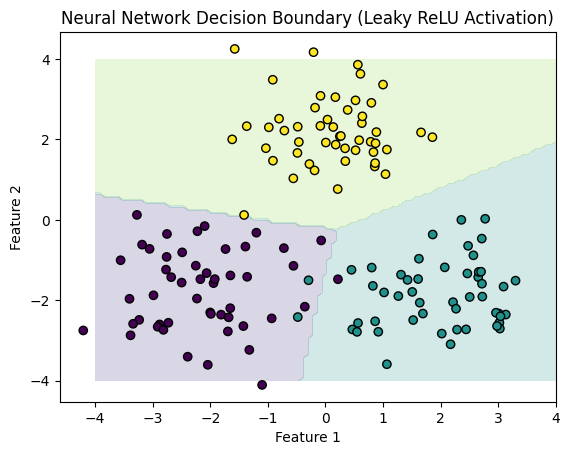

In [29]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Leaky ReLU Activation)")
plt.show()

---

### **PReLU (Parametric Rectified Linear Unit) Activation Function**  

#### **Introduction**  
**PReLU (Parametric ReLU)** is an improvement over **Leaky ReLU**, where instead of using a **fixed** negative slope ($\alpha$), we **learn** it during training.

The function is defined as:

$$
\text{PReLU}(x) =
\begin{cases} 
    x, & x > 0 \\
    \alpha x, & x \leq 0
\end{cases}
$$

where **$\alpha$** is a **trainable parameter**, rather than a fixed value like in Leaky ReLU.


### **Why Use PReLU?**  
**Advantages**:
- **Solves the dying ReLU problem** by allowing negative gradients.  
- **Learns the best slope** for negative inputs instead of using a fixed value.  
- **Boosts performance in deep networks**, particularly in **CNNs**.  

**Disadvantages**:
- **More parameters** to learn, increasing model complexity.  
- **Risk of overfitting** if too many negative slopes are learned incorrectly.  

### **Historical Reference**  
PReLU was introduced by **Kaiming He et al. (2015)** in their paper:  

- **"Delving Deep into Rectifiers: Surpassing Human-Level Performance on ImageNet Classification"** (ICCV 2015).  

The authors used **PReLU** in **deep convolutional networks**, leading to **state-of-the-art performance on ImageNet**.

### **PyTorch Implementation of a Neural Network Using PReLU**
We'll modify our **multi-class classification** network by replacing **Leaky ReLU with PReLU**.

#### **Step 1: Define the Neural Network with PReLU**

In [30]:
class PReLUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(PReLUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.prelu1 = nn.PReLU()  # PReLU for first hidden layer
        self.prelu2 = nn.PReLU()  # PReLU for second hidden layer
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.prelu1(self.hidden1(x))  # First hidden layer with PReLU
        x = self.prelu2(self.hidden2(x))  # Second hidden layer with PReLU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [31]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = PReLUNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.6053
Epoch 200/1000, Loss: 0.5805
Epoch 300/1000, Loss: 0.5773
Epoch 400/1000, Loss: 0.5759
Epoch 500/1000, Loss: 0.5751
Epoch 600/1000, Loss: 0.5745
Epoch 700/1000, Loss: 0.5740
Epoch 800/1000, Loss: 0.5736
Epoch 900/1000, Loss: 0.5733
Epoch 1000/1000, Loss: 0.5730


In [32]:
model.prelu1.weight

Parameter containing:
tensor([1.4506], requires_grad=True)

In [33]:
model.prelu2.weight

Parameter containing:
tensor([0.9357], requires_grad=True)

#### **Step 3: Visualize Decision Boundaries**

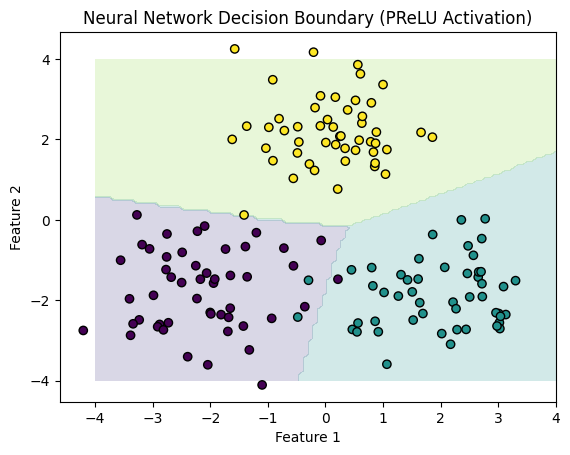

In [34]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (PReLU Activation)")
plt.show()

---

### **ELU (Exponential Linear Unit) Activation Function**  

#### **Introduction**  
The **Exponential Linear Unit (ELU)** activation function was introduced to address the **mean shift problem** in ReLU-based networks. Unlike ReLU and Leaky ReLU, ELU allows **smooth, nonzero negative outputs**, helping stabilize training.

The function is defined as:

$$
\text{ELU}(x) =
\begin{cases} 
    x, & x > 0 \\
    \alpha (e^x - 1), & x \leq 0
\end{cases}
$$

where **$\alpha$** is a **hyperparameter** (typically set to 1.0).


### **Why Use ELU?**  
**Advantages**:  
- **Solves the dying ReLU problem** by allowing smooth negative values.  
- **Reduces mean shift** (helps gradients stay centered around zero).  
- **Smooth function** → better convergence than ReLU in some cases.  

**Disadvantages**:  
- **More computation** than ReLU due to exponentiation.  
- **$\alpha$** needs tuning for best performance.  

### **Historical Reference**  
ELU was introduced by **Clevert, Unterthiner, & Hochreiter (2015)** in their paper:  

- **"Fast and Accurate Deep Network Learning by Exponential Linear Units (ELUs)"** (ICLR 2015).  

This paper showed that **ELU outperforms ReLU and Leaky ReLU in deep networks** by improving gradient flow.

### **PyTorch Implementation of a Neural Network Using ELU**
We'll modify our **multi-class classification** network by replacing **PReLU with ELU**.

#### **Step 1: Define the Neural Network with ELU**

In [35]:
class ELUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size, alpha=1.0):
        super(ELUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.elu = nn.ELU(alpha)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.elu(self.hidden1(x))  # First hidden layer with ELU
        x = self.elu(self.hidden2(x))  # Second hidden layer with ELU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [36]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes
alpha = 1.0  # ELU parameter

model = ELUNN(input_size, hidden_size1, hidden_size2, output_size, alpha)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.6247
Epoch 200/1000, Loss: 0.5909
Epoch 300/1000, Loss: 0.5832
Epoch 400/1000, Loss: 0.5799
Epoch 500/1000, Loss: 0.5780
Epoch 600/1000, Loss: 0.5768
Epoch 700/1000, Loss: 0.5759
Epoch 800/1000, Loss: 0.5752
Epoch 900/1000, Loss: 0.5746
Epoch 1000/1000, Loss: 0.5741


#### **Step 3: Visualize Decision Boundaries**

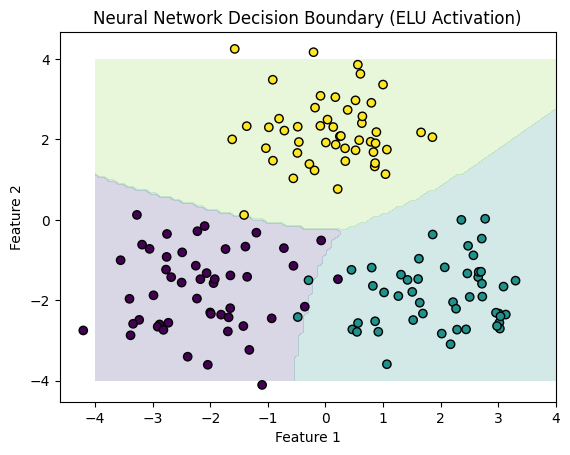

In [37]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (ELU Activation)")
plt.show()

---

### **SELU (Scaled Exponential Linear Unit) Activation Function**  

#### **Introduction**  
**SELU (Scaled Exponential Linear Unit)** is an improvement over ELU. It was designed to ensure that activations automatically normalize themselves during training, keeping the network stable and improving convergence. SELU was introduced as part of **Self-Normalizing Neural Networks (SNNs)**.

The function is defined as:

$$
\text{SELU}(x) =
\begin{cases} 
    \lambda x, & x > 0 \\
    \lambda \alpha (e^x - 1), & x \leq 0
\end{cases}
$$

where **$\lambda$** and **$\alpha$** are fixed scaling parameters:

- $\alpha \approx 1.67326$  
- $\lambda \approx 1.0507$  

These values are **not hyperparameters**; they are derived mathematically to enforce **self-normalization**.
### **Why Use SELU?**  
**Advantages**:  
- **Self-Normalization**: Keeps activations close to mean **0** and variance **1**.  
- **Faster Convergence**: No need for Batch Normalization in many cases.  
- **Prevents Vanishing/Exploding Gradients**: Improves training stability.  

**Disadvantages**:  
- **Only Works Well with Proper Initialization**: Use **LeCun normal** initialization.  
- **Sensitive to Architecture Changes**: Works best in **deep fully connected networks** but may not be ideal for CNNs.  

### **Historical Reference**  
SELU was introduced by **Klambauer et al. (2017)** in their paper:  

- **"Self-Normalizing Neural Networks"** (NeurIPS 2017).  

The paper showed that using **SELU with Self-Normalizing Networks (SNNs)** eliminates the need for **Batch Normalization** in deep networks.

### **PyTorch Implementation of a Neural Network Using SELU**
We'll modify our **multi-class classification** network by replacing **ELU with SELU**.

#### **Step 1: Define the Neural Network with SELU**

In [38]:
class SELUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SELUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.selu = nn.SELU()
        self.softmax = nn.Softmax(dim=1)

        # Important: LeCun Normal Initialization
        nn.init.kaiming_normal_(self.hidden1.weight, nonlinearity='linear')
        nn.init.kaiming_normal_(self.hidden2.weight, nonlinearity='linear')
        nn.init.kaiming_normal_(self.output.weight, nonlinearity='linear')

    def forward(self, x):
        x = self.selu(self.hidden1(x))  # First hidden layer with SELU
        x = self.selu(self.hidden2(x))  # Second hidden layer with SELU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [39]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = SELUNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.5862
Epoch 200/1000, Loss: 0.5809
Epoch 300/1000, Loss: 0.5791
Epoch 400/1000, Loss: 0.5783
Epoch 500/1000, Loss: 0.5777
Epoch 600/1000, Loss: 0.5773
Epoch 700/1000, Loss: 0.5769
Epoch 800/1000, Loss: 0.5765
Epoch 900/1000, Loss: 0.5760
Epoch 1000/1000, Loss: 0.5753


#### **Step 3: Visualize Decision Boundaries**

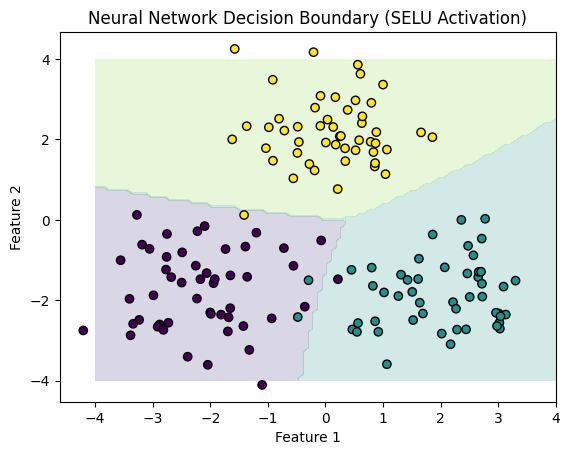

In [40]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (SELU Activation)")
plt.show()

---

### **Swish Activation Function**  

#### **Introduction**  
The **Swish** activation function was introduced by **Google Brain** as a smooth alternative to ReLU, designed to improve gradient flow in deep networks. Swish is defined as:

$$
\text{Swish}(x) = x \cdot \sigma(x)
$$

where $\sigma(x)$ is the **sigmoid function**:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Since Swish is **non-monotonic** (it decreases for negative values before increasing), it can outperform ReLU in deep learning models.

### **Why Use Swish?**  
**Advantages**:  
- **Smooth & Differentiable**: Unlike ReLU, Swish is differentiable everywhere.  
- **No Hard Cutoff**: Unlike ReLU, negative values are not forced to zero.  
- **Better for Deep Networks**: Swish outperforms ReLU in very deep architectures.  

**Disadvantages**:  
- **More Expensive**: Requires computing **sigmoid**, making it costlier than ReLU.  
- **Not Always Better**: Performance improvements depend on the dataset and architecture.

### **Historical Reference**  
Swish was introduced by **Ramachandran, Zoph, and Le (2017)** in their paper:  

- **"Searching for Activation Functions"** (Google Brain, 2017).  

This paper showed that **Swish outperforms ReLU in deep neural networks**, especially in **ImageNet classification tasks**.

### **PyTorch Implementation of a Neural Network Using Swish**
We'll modify our **multi-class classification** network by replacing **SELU with Swish**.

#### **Step 1: Define the Swish Activation Function in PyTorch**
PyTorch does not have a built-in Swish function, so we need to define it manually.

In [41]:
class Swish(nn.Module):
    def forward(self, x):
        return x * torch.sigmoid(x)

#### **Step 2: Define the Neural Network with Swish**

In [42]:
class SwishNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(SwishNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.swish = Swish()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.swish(self.hidden1(x))  # First hidden layer with Swish
        x = self.swish(self.hidden2(x))  # Second hidden layer with Swish
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 3: Train the Network**

In [43]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = SwishNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.6259
Epoch 200/1000, Loss: 0.5865
Epoch 300/1000, Loss: 0.5822
Epoch 400/1000, Loss: 0.5807
Epoch 500/1000, Loss: 0.5799
Epoch 600/1000, Loss: 0.5792
Epoch 700/1000, Loss: 0.5787
Epoch 800/1000, Loss: 0.5781
Epoch 900/1000, Loss: 0.5775
Epoch 1000/1000, Loss: 0.5770


#### **Step 4: Visualize Decision Boundaries**

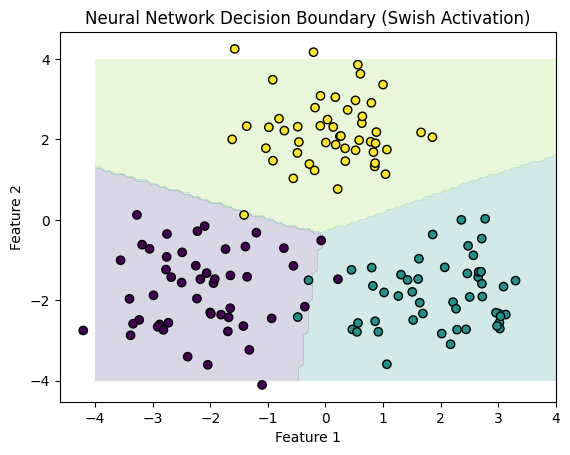

In [44]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Swish Activation)")
plt.show()

---

### **Mish Activation Function**  

#### **Introduction**  
Mish is a **smooth, self-regularized, non-monotonic** activation function introduced as an improvement over **Swish**. It is defined as:

$$
\text{Mish}(x) = x \cdot \tanh(\text{softplus}(x))
$$

where **softplus** is given by:

$$
\text{softplus}(x) = \ln(1 + e^x)
$$

Mish is similar to Swish but has a smoother second derivative, which helps in training **very deep neural networks**.

### **Why Use Mish?**  
**Advantages**:  
- **Smooth & Differentiable**: No abrupt changes like ReLU.  
- **Stronger Gradient Flow**: Works well in **very deep** networks.  
- **Non-Monotonic**: Allows small negative values, improving representation learning.  

**Disadvantages**:  
- **More Computationally Expensive**: Requires **tanh** and **softplus** calculations.  
- **Not Always Better**: Performance varies across tasks and datasets.  


### **Historical Reference**  
Mish was introduced by **Diganta Misra (2019)** in the paper:  

- **"Mish: A Self Regularized Non-Monotonic Activation Function"**.  

The paper showed that **Mish outperforms Swish, ReLU, and GELU** on various deep learning benchmarks.

### **PyTorch Implementation of a Neural Network Using Mish**
We'll modify our **multi-class classification** network by replacing **Swish with Mish**.

#### **Step 1: Define the Mish Activation Function in PyTorch**
PyTorch does not have a built-in Mish function, so we need to define it manually.

In [45]:
class Mish(nn.Module):
    def forward(self, x):
        return x * torch.tanh(F.softplus(x))

#### **Step 2: Define the Neural Network with Mish**

In [46]:
class MishNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(MishNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.mish = Mish()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.mish(self.hidden1(x))  # First hidden layer with Mish
        x = self.mish(self.hidden2(x))  # Second hidden layer with Mish
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 3: Train the Network**

In [49]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = MishNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.7255
Epoch 200/1000, Loss: 0.5919
Epoch 300/1000, Loss: 0.5844
Epoch 400/1000, Loss: 0.5820
Epoch 500/1000, Loss: 0.5809
Epoch 600/1000, Loss: 0.5801
Epoch 700/1000, Loss: 0.5795
Epoch 800/1000, Loss: 0.5789
Epoch 900/1000, Loss: 0.5782
Epoch 1000/1000, Loss: 0.5775


#### **Step 4: Visualize Decision Boundaries**

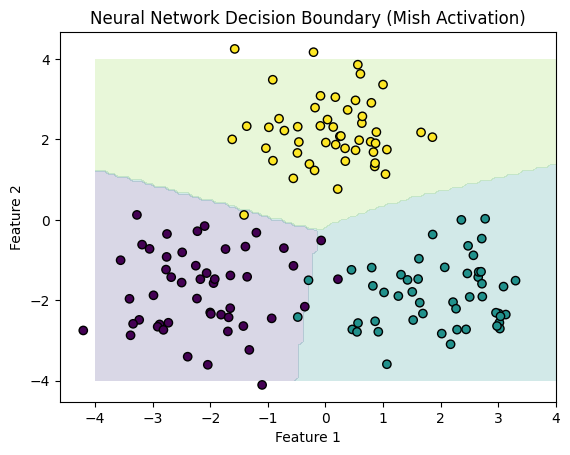

In [50]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (Mish Activation)")
plt.show()

---

### **GELU (Gaussian Error Linear Unit) Activation Function**  

#### **Introduction**  
The **GELU (Gaussian Error Linear Unit)** activation function was introduced as a smoother alternative to ReLU and Swish. It is commonly used in **Transformer models** (e.g., BERT, GPT) and is defined as:

$$
\text{GELU}(x) = x \cdot \Phi(x)
$$

where $\Phi(x)$ is the **Gaussian cumulative distribution function (CDF)**:

$$
\Phi(x) = \frac{1}{2} \left( 1 + \text{erf} \left( \frac{x}{\sqrt{2}} \right) \right)
$$

An **approximate** version used in practical implementations is:

$$
\text{GELU}(x) \approx 0.5 x \left( 1 + \tanh \left( \sqrt{\frac{2}{\pi}} \left( x + 0.044715 x^3 \right) \right) \right)
$$

This version is preferred because it avoids expensive **error function (erf)** computations.

### **Why Use GELU?**  
**Advantages**:  
- **Smooth & Differentiable**: Unlike ReLU, it has no abrupt cutoffs.  
- **Stochastic Behavior**: The CDF component acts like **adaptive gating**, keeping some negative values instead of forcing them to zero.  
- **Best for NLP Models**: GELU is the default activation function in **BERT, GPT-2, and Transformer-based models**.

**Disadvantages**:  
- **Computationally Expensive**: Requires calculating **erf** or its approximation.  
- **Not Always Better**: Works best in **large-scale models** but may not improve performance in smaller networks.

### **Historical Reference**  
GELU was introduced by **Hendrycks & Gimpel (2016)** in the paper:  

- **"Gaussian Error Linear Units (GELUs)"**  

This paper demonstrated that GELU **outperforms ReLU and ELU in deep architectures**.

### **PyTorch Implementation of a Neural Network Using GELU**
We'll modify our **multi-class classification** network by replacing **Mish with GELU**.

#### **Step 1: Define the GELU Activation Function in PyTorch**
PyTorch has a built-in **GELU** function, so we can directly use `F.gelu()`.

In [51]:
class GELUNN(nn.Module):
    def __init__(self, input_size, hidden_size1, hidden_size2, output_size):
        super(GELUNN, self).__init__()
        self.hidden1 = nn.Linear(input_size, hidden_size1)
        self.hidden2 = nn.Linear(hidden_size1, hidden_size2)
        self.output = nn.Linear(hidden_size2, output_size)

        self.gelu = nn.GELU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.gelu(self.hidden1(x))  # First hidden layer with GELU
        x = self.gelu(self.hidden2(x))  # Second hidden layer with GELU
        x = self.softmax(self.output(x))  # Output layer with softmax
        return x

#### **Step 2: Train the Network**

In [52]:
# Define model
input_size = 2
hidden_size1 = 8
hidden_size2 = 6
output_size = 3  # Three classes

model = GELUNN(input_size, hidden_size1, hidden_size2, output_size)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

# Training loop
epochs = 1000
for epoch in range(epochs):
    optimizer.zero_grad()

    # Forward pass
    y_pred = model(X_train)

    # Compute loss
    loss = criterion(y_pred, y_train)

    # Backpropagation
    loss.backward()
    optimizer.step()

    # Print loss every 100 epochs
    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{epochs}, Loss: {loss.item():.4f}")

Epoch 100/1000, Loss: 0.8928
Epoch 200/1000, Loss: 0.6870
Epoch 300/1000, Loss: 0.5865
Epoch 400/1000, Loss: 0.5812
Epoch 500/1000, Loss: 0.5795
Epoch 600/1000, Loss: 0.5785
Epoch 700/1000, Loss: 0.5777
Epoch 800/1000, Loss: 0.5768
Epoch 900/1000, Loss: 0.5760
Epoch 1000/1000, Loss: 0.5753


#### **Step 3: Visualize Decision Boundaries**

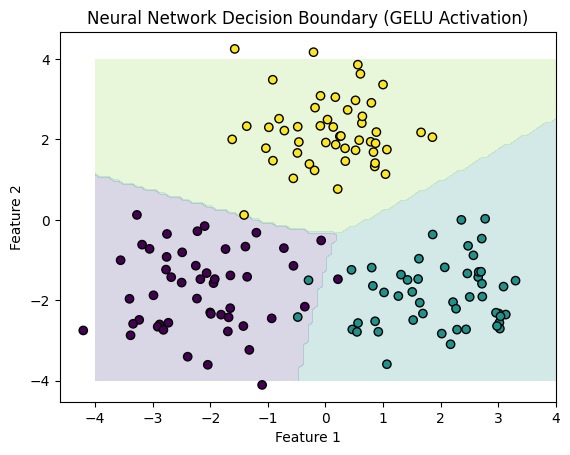

In [53]:
# Generate meshgrid
xx, yy = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
grid = torch.tensor(np.c_[xx.ravel(), yy.ravel()], dtype=torch.float32)

# Predict for each point in the grid
with torch.no_grad():
    Z = model(grid)
    Z = torch.argmax(Z, dim=1).reshape(xx.shape)

# Plot decision boundary
plt.contourf(xx, yy, Z, levels=2, cmap="viridis", alpha=0.2)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap="viridis", edgecolors="k")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Neural Network Decision Boundary (GELU Activation)")
plt.show()